In [1]:
import cv2
import time
import os
import pandas as pd
import pytesseract
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

pytesseract.pytesseract.tesseract_cmd = r'C:\Users\oliphaj.TRN\AppData\Local\Tesseract-OCR\tesseract.exe'

In [ ]:
def video_to_frames(input_loc, output_loc):
    """Function to extract frames from input video file
    and save them as separate frames in an output directory.
    Args:
        input_loc: Input video file.
        output_loc: Output directory to save the frames.
    Returns:
        None
    """
    try:
        os.mkdir(output_loc)
    except OSError:
        pass
    # Log the time
    time_start = time.time()
    # Start capturing the feed
    cap = cv2.VideoCapture(input_loc)
    # Find the number of frames
    video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
    print ("Number of frames: ", video_length)
    count = 0
    print ("Converting video..\n")
    # Start converting the video
    while cap.isOpened():
        # Extract the frame
        ret, frame = cap.read()
        if not ret:
            continue
        # Write the results back to output location.
        cv2.imwrite(output_loc + "/%#05d.jpg" % (count+1), frame)
        count = count + 1
        # If there are no more frames left
        if (count > (video_length-1)):
            # Log the time again
            time_end = time.time()
            # Release the feed
            cap.release()
            # Print stats
            print ("Done extracting frames.\n%d frames extracted" % count)
            print ("It took %d seconds forconversion." % (time_end-time_start))
            break

In [2]:
def convert_image_to_scalars(imgfilename):
    imgdata = np.asarray(Image.open(imgfilename))
    gray = cv2.cvtColor(imgdata[5:,200:-180,:], cv2.COLOR_BGR2GRAY)
    smaller = cv2.resize(gray, None, fx=.2616, fy=.5, interpolation=cv2.INTER_AREA)
    df = pd.DataFrame(smaller)
    peaks1,_ = find_peaks(df.sum(axis=1),prominence=1.5e3)
    peaks2,_ = find_peaks(df.sum(axis=0),prominence=1.5e3)
    
    return len(peaks1), len(peaks2), np.std(peaks1), np.std(peaks2), peaks1[0], peaks2[0], np.mean(smaller)

In [43]:
def convert_image_hog(imgfilename):
    imgdata = np.asarray(Image.open(imgfiles[305]))
    gray = cv2.cvtColor(imgdata[5:,200:-180,:], cv2.COLOR_BGR2GRAY)
    smaller = cv2.resize(gray, None, fx=.02616, fy=.05, interpolation=cv2.INTER_AREA)
    df = pd.DataFrame(smaller)
    gx = cv2.Sobel(smaller,cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(smaller,cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    
    return np.concatenate( (np.mean(angle,axis=0), np.mean(angle,axis=1), np.mean(mag,axis=0), np.mean(mag,axis=1)), axis=0)

In [3]:
input_loc = 'screen-20221123-141710_2.mp4'
output_loc = r'C:\Users\oliphaj.TRN\Documents\ML on amp data video\frames'
#video_to_frames(input_loc, output_loc)

In [4]:
imgfiles = [output_loc + '\\' + str(num).zfill(5) + '.jpg' for num in range(1,490)]

In [5]:
hog = cv2.HOGDescriptor()

In [20]:
winStride = (8,8)
padding = (8,8)
locations = ((15,20),)
image = cv2.imread(imgfiles[305],0)
h = hog.compute(smaller,winStride,padding,locations)
h

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [21]:
len(h)

3780

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,14,48,42,28,0,9,48,43,32,0,0,0,0
1,0,0,0,148,255,255,196,15,126,255,255,205,31,0,0,0
2,0,0,0,26,102,102,187,14,152,103,102,172,39,0,0,0
3,0,0,0,0,0,0,199,8,200,3,0,174,33,0,0,0
4,0,0,0,0,0,0,204,2,200,0,0,182,24,0,0,0
5,0,0,0,0,0,0,206,0,202,0,0,189,18,0,0,0
6,0,0,0,66,175,175,153,0,152,174,175,166,4,0,0,0
7,0,0,1,174,231,231,75,0,85,231,231,157,0,0,0,0
8,0,0,5,193,0,0,0,0,0,0,0,202,1,0,0,0
9,0,0,13,190,0,0,0,0,0,0,0,204,0,0,0,0


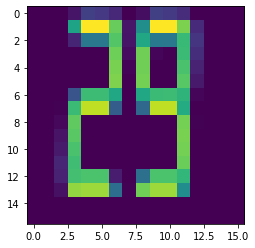

In [22]:
imgdata = np.asarray(Image.open(imgfiles[305]))
gray = cv2.cvtColor(imgdata[5:,200:-180,:], cv2.COLOR_BGR2GRAY)
smaller = cv2.resize(gray, None, fx=.02616, fy=.05, interpolation=cv2.INTER_AREA)
plt.imshow(smaller)
df = pd.DataFrame(smaller)
df

array([  0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
       204.      ,   7.28011 ,   8.944272,   2.828427, 200.02249 ,
       182.      ,  28.301943, 182.61708 ,  24.      ,   0.      ,
         0.      ], dtype=float32)

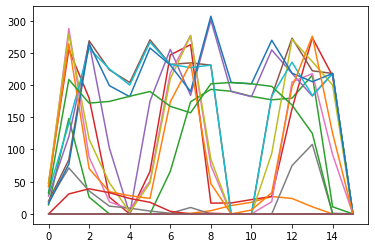

In [27]:
gx = cv2.Sobel(smaller,cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(smaller,cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
plt.plot(mag)
mag[4,:]

In [42]:
#plt.imshow(angle)
#plt.plot(angle)
np.mean(angle,axis=1)

array([ 67.5     ,  72.53467 , 149.88518 , 139.1619  ,  64.37904 ,
       114.58612 , 103.866165, 124.77243 , 136.31187 ,  36.5271  ,
        53.139275,  73.44274 ,  83.04425 , 163.59306 , 168.75    ,
         0.      ], dtype=float32)

In [52]:
data = pd.DataFrame([convert_image_to_scalars(file) for file in imgfiles],
                                 columns=['numpeaks1','numpeaks2','stdpeaks1',
                                          'stdpeaks2','firstpeak1','firstpeak2','mean'])
data

,numpeaks1,numpeaks2,stdpeaks1,stdpeaks2,firstpeak1,firstpeak2,mean
0,3,2,48.609556,13.500000,15,61,22.487590
1,3,2,48.609556,13.500000,15,61,22.479043
2,3,2,48.609556,13.500000,15,61,22.471647
3,3,2,48.194052,13.500000,15,61,22.481386
4,3,2,48.609556,13.500000,15,61,22.506862
...,...,...,...,...,...,...,...
484,3,4,47.779587,29.068884,15,35,48.575321
485,3,4,47.779587,29.068884,15,35,48.570595
486,3,3,48.609556,33.319997,15,35,48.758259
487,3,3,48.609556,33.319997,15,35,48.753863


In [46]:
data2 = pd.DataFrame([convert_image_hog(file) for file in imgfiles],
                                 #columns=['numpeaks1','numpeaks2','stdpeaks1',
                                  #        'stdpeaks2','firstpeak1','firstpeak2','mean']
                   )
data2

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,62.176125,129.562927,148.783127,143.26825,144.500717,107.220421,139.896332,136.059769,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
1,0.0,0.0,62.176125,129.562927,148.783127,143.26825,144.500717,107.220421,139.896332,136.059769,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
2,0.0,0.0,62.176125,129.562927,148.783127,143.26825,144.500717,107.220421,139.896332,136.059769,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
3,0.0,0.0,62.176125,129.562927,148.783127,143.26825,144.500717,107.220421,139.896332,136.059769,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
4,0.0,0.0,62.176125,129.562927,148.783127,143.26825,144.500717,107.220421,139.896332,136.059769,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,0.0,0.0,62.176125,129.562927,148.783127,143.26825,144.500717,107.220421,139.896332,136.059769,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
485,0.0,0.0,62.176125,129.562927,148.783127,143.26825,144.500717,107.220421,139.896332,136.059769,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
486,0.0,0.0,62.176125,129.562927,148.783127,143.26825,144.500717,107.220421,139.896332,136.059769,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
487,0.0,0.0,62.176125,129.562927,148.783127,143.26825,144.500717,107.220421,139.896332,136.059769,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0


<AxesSubplot:>

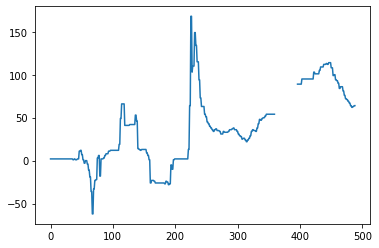

In [47]:
ampdata = pd.read_csv('video_data.csv')['2']
ampdata.plot()

In [58]:
data['amps'] = ampdata

In [53]:
data = pd.concat([data,data2],axis=1)

In [59]:
data

,numpeaks1,numpeaks2,stdpeaks1,stdpeaks2,firstpeak1,firstpeak2,mean,0,1,2,...,55,56,57,58,59,60,61,62,63,amps
0,3,2,48.609556,13.500000,15,61,22.487590,0.0,0.0,62.176125,...,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0,2.0
1,3,2,48.609556,13.500000,15,61,22.479043,0.0,0.0,62.176125,...,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0,2.0
2,3,2,48.609556,13.500000,15,61,22.471647,0.0,0.0,62.176125,...,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0,2.0
3,3,2,48.194052,13.500000,15,61,22.481386,0.0,0.0,62.176125,...,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0,2.0
4,3,2,48.609556,13.500000,15,61,22.506862,0.0,0.0,62.176125,...,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,3,4,47.779587,29.068884,15,35,48.575321,0.0,0.0,62.176125,...,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0,62.0
485,3,4,47.779587,29.068884,15,35,48.570595,0.0,0.0,62.176125,...,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0,63.0
486,3,3,48.609556,33.319997,15,35,48.758259,0.0,0.0,62.176125,...,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0,63.0
487,3,3,48.609556,33.319997,15,35,48.753863,0.0,0.0,62.176125,...,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0,64.0


In [62]:
data.dropna(axis=0,inplace=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 488
Data columns (total 72 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   numpeaks1   453 non-null    int64  
 1   numpeaks2   453 non-null    int64  
 2   stdpeaks1   453 non-null    float64
 3   stdpeaks2   453 non-null    float64
 4   firstpeak1  453 non-null    int64  
 5   firstpeak2  453 non-null    int64  
 6   mean        453 non-null    float64
 7   0           453 non-null    float32
 8   1           453 non-null    float32
 9   2           453 non-null    float32
 10  3           453 non-null    float32
 11  4           453 non-null    float32
 12  5           453 non-null    float32
 13  6           453 non-null    float32
 14  7           453 non-null    float32
 15  8           453 non-null    float32
 16  9           453 non-null    float32
 17  10          453 non-null    float32
 18  11          453 non-null    float32
 19  12          453 non-null    f

In [ ]:
sns.pairplot(data=data)

In [64]:
X = data.drop('amps',axis=1)
y = data['amps']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [65]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

0.2812327726643047
37.321720844817094
0.2812327726643047


In [66]:
rfr = RandomForestRegressor()
  
rfr.fit(X_train, y_train)
print(rfr.score(X_test, y_test))
y_pred = rfr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

0.9155952002392164
12.789427331612163
0.9155952002392164


In [67]:
allpred = rfr.predict(X)

In [68]:
rfr_results = pd.DataFrame(y)
rfr_results['rfr'] = allpred
rfr_results = rfr_results.reindex()

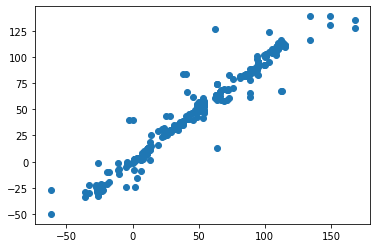

In [69]:
plt.plot(rfr_results.amps,rfr_results.rfr,'o')

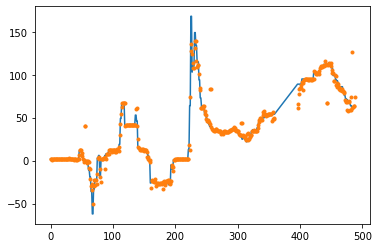

In [70]:
plt.plot(rfr_results.amps)
plt.plot(rfr_results.rfr,'.')

In [71]:
imgfiles = [output_loc + '\\' + str(num).zfill(5) + '.jpg' for num in range(1,2414)]
data1 = pd.DataFrame([convert_image_to_scalars(file) for file in imgfiles],
                                 columns=['numpeaks1','numpeaks2','stdpeaks1',
                                          'stdpeaks2','firstpeak1','firstpeak2','mean'])
data2 = pd.DataFrame([convert_image_hog(file) for file in imgfiles])
finaldata = pd.concat([data1,data2],axis=1)
finaldata

,numpeaks1,numpeaks2,stdpeaks1,stdpeaks2,firstpeak1,firstpeak2,mean,0,1,2,...,54,55,56,57,58,59,60,61,62,63
0,3,2,48.609556,13.5,15,61,22.487590,0.0,0.0,62.176125,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
1,3,2,48.609556,13.5,15,61,22.479043,0.0,0.0,62.176125,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
2,3,2,48.609556,13.5,15,61,22.471647,0.0,0.0,62.176125,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
3,3,2,48.194052,13.5,15,61,22.481386,0.0,0.0,62.176125,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
4,3,2,48.609556,13.5,15,61,22.506862,0.0,0.0,62.176125,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,2,2,59.500000,16.5,15,58,25.577827,0.0,0.0,62.176125,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
2409,2,2,59.500000,16.5,15,58,25.576348,0.0,0.0,62.176125,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
2410,2,2,59.500000,16.5,15,58,25.577868,0.0,0.0,62.176125,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0
2411,2,2,59.500000,16.5,15,58,25.576142,0.0,0.0,62.176125,...,127.359993,139.240479,105.939026,51.154755,50.921329,91.592377,139.291122,141.096039,94.6875,0.0


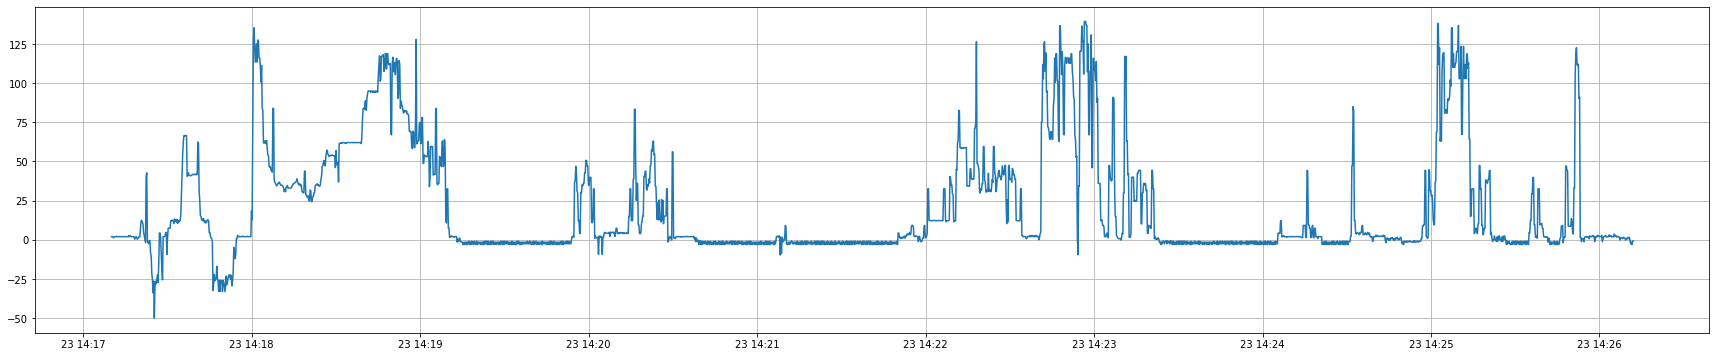

In [72]:
allpred = rfr.predict(finaldata)
times = pd.date_range('2022-11-23 14:17:10',periods=len(allpred),freq='{0:.6f}S'.format(1/4.45))
plt.figure(figsize=(30,6))
plt.plot(times,allpred)
plt.grid()